In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def imprimirDFFormatado(df, titulo):
    print(f'Conjunto de {titulo}')
    print(df.to_string(index=False))
    print(df.shape)
    print()

C:\Users\flavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\flavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conjunto de treino
 Temperatura (C)  Qtd Sorvete Vendidos (unidades)
              21                              232
              29                              303
              27                              287
              32                              333
              24                              238
              34                              317
              26                              274
              25                              265
              28                              264
              24                              243
              21                              213
              19                              201
              29                              294
              20                              204
              19                              198
              20                              200
              31                              315
              32                              337
              33               

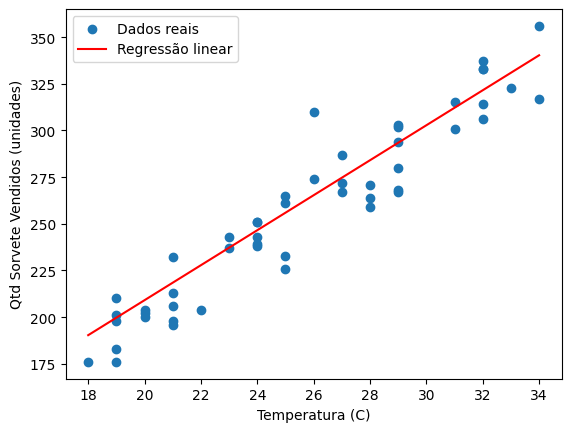

In [4]:
# Importando all_sorvete.csv da pasta data
df = pd.read_csv('data/all_sorvete.csv')

# Dividindo os dados em conjuntos de treinamento, validação e teste (40%, 30%, 30%)
treino, validacao, teste = np.split(df.sample(frac=1, random_state=42), [int(.4*len(df)), int(.7*len(df))])
imprimirDFFormatado(treino, 'treino')
imprimirDFFormatado(validacao, 'validacao')
imprimirDFFormatado(teste, 'teste')

# Exemplo de regressão linear com scikit-learn
modelo = LinearRegression()
modelo.fit(treino[['Temperatura (C)']], treino['Qtd Sorvete Vendidos (unidades)'])
print(f'Coeficiente angular: {modelo.coef_[0]:.2f}')
print(f'Coeficiente linear: {modelo.intercept_:.2f}')
print()

# Avaliando o modelo
r2_treino = modelo.score(treino[['Temperatura (C)']], treino["Qtd Sorvete Vendidos (unidades)"])
r2_validacao = modelo.score(validacao[['Temperatura (C)']], validacao["Qtd Sorvete Vendidos (unidades)"])
r2_teste = modelo.score(teste[['Temperatura (C)']], teste["Qtd Sorvete Vendidos (unidades)"])

print(f'R² treino: {r2_treino:.2f}')
print(f'R² validação: {r2_validacao:.2f}')
print(f'R² teste: {r2_teste:.2f}')


# Fazendo previsões
temperatura = 30
previsao = modelo.predict([[temperatura]])
print(f'Previsão de vendas para uma temperatura de {temperatura}C: {previsao[0]:.2f} unidades')

# mostrando gráfico
plt.scatter(df['Temperatura (C)'], df['Qtd Sorvete Vendidos (unidades)'], label='Dados reais')
plt.plot(df['Temperatura (C)'], modelo.predict(df[['Temperatura (C)']]), color='red', label='Regressão linear')
plt.xlabel('Temperatura (C)')
plt.ylabel('Qtd Sorvete Vendidos (unidades)')
plt.legend()
plt.show()


# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2